In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Code was run ahead of time because LinkedList takes way too long
!java -cp target/classes ece325.Benchmark ll | tee resultsll.csv

collection,n,add,remove
java.util.LinkedList,	32,	1.09294E-4,	3.3187E-5
java.util.LinkedList,	64,	2.3278E-4,	2.5495E-5
java.util.LinkedList,	128,	9.8735E-5,	1.82E-5
java.util.LinkedList,	256,	2.78009E-4,	4.1021E-5
java.util.LinkedList,	512,	0.001052544,	1.24427E-4
java.util.LinkedList,	1024,	0.003206364,	3.88755E-4
java.util.LinkedList,	2048,	0.018115869,	0.001906605
java.util.LinkedList,	4096,	0.104152711,	0.008973021
java.util.LinkedList,	8192,	0.742417431,	0.069273563
java.util.LinkedList,	16384,	4.782073431,	0.387557389


In [4]:
!java -cp target/classes ece325.Benchmark | tee results.csv
!cat resultsll.csv >> results.csv

collection,n,add,remove
java.util.ArrayList,	32,	1.76319E-4,	5.3737E-5
java.util.ArrayList,	64,	1.45664E-4,	5.5639E-5
java.util.ArrayList,	128,	7.4682E-5,	1.9117E-5
java.util.ArrayList,	256,	1.30652E-4,	3.4949E-5
java.util.ArrayList,	512,	2.86367E-4,	8.2365E-5
java.util.ArrayList,	1024,	0.001167901,	1.49394E-4
java.util.ArrayList,	2048,	9.13506E-4,	3.91663E-4
java.util.ArrayList,	4096,	0.001654741,	0.001238286
java.util.ArrayList,	8192,	0.00422339,	0.002630743
java.util.ArrayList,	16384,	0.014062294,	0.009035433
java.util.Vector,	32,	5.608E-5,	1.812E-5
java.util.Vector,	64,	6.8857E-5,	1.7215E-5
java.util.Vector,	128,	1.18667E-4,	1.0787E-5
java.util.Vector,	256,	2.5605E-4,	2.9225E-5
java.util.Vector,	512,	4.2512E-4,	7.2632E-5
java.util.Vector,	1024,	2.89425E-4,	1.08426E-4
java.util.Vector,	2048,	7.79816E-4,	3.20229E-4
java.util.Vector,	4096,	0.001409903,	6.863E-4
java.util.Vector,	8192,	0.005336425,	0.004127466
java.util.Vector,	16384,	0.015594499,	0.011149073
ece325.SkipListList,	32,	6

In [8]:
data = pd.read_csv("results.csv")

def get_collection(name):
    return data[data.collection==name]

labels = ["java.util.ArrayList", "java.util.LinkedList", "java.util.Vector", "ece325.SkipListList"]

n = len(labels)
collections = np.empty(n, dtype=object)

for i in range(n):
    collections[i] = get_collection(labels[i])

# exclude ll
excludeLL = True

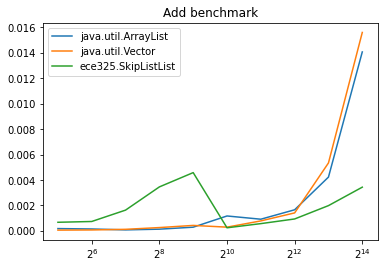

In [9]:
plt.title("Add benchmark")
plt.xscale('log', base=2)

for i in range(n):
    if excludeLL and i == 1: continue 

    plt.plot(collections[i]["n"], collections[i]["add"], label=labels[i])

plt.legend();

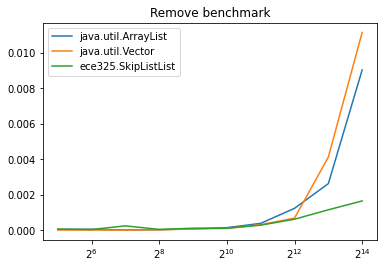

In [10]:
plt.title("Remove benchmark")
plt.xscale('log', base=2)
for i in range(n):
    # remove LinkedList from plot
    if excludeLL and i == 1: continue

    plt.plot(collections[i]["n"], collections[i]["remove"], label=labels[i])

plt.legend();

